<span>
<b>Methods Workshop in Quantitative Text Analysis </b><br/>     
<b>Author:</b> <a href="https://github.com/jisukimmmm">Jisu Kim</a><br/>
<b>Python version:</b>  >=3.6<br/>
<b>Last update:</b> 21/05/2024
</span>

<a id='top'></a>
# *Advanced Text analysis in Python - Supervised ML - Exercises*


In this series of exercises, we delve into the fascinating realm of Natural Language Processing (NLP) using two classic literary works: "Alice's Adventures in Wonderland" by Lewis Carroll and "Frankenstein" by Mary Shelley. These exercises focus on various NLP tasks, including Named Entity Recognition (NER), text classification, and feature importance analysis using machine learning algorithms.

We start by preprocessing the text data, extracting relevant features, and labeling entities such as names of characters, locations, and organizations in the first chapters of both books. Next, we explore different machine learning models, including Support Vector Machines (SVMs), Decision Trees (DTs), and Random Forests (RFs), to perform text classification tasks.

# Exercises

1. [Naive Bayes](#naive)<br>
Document Sorting with Limited Labels: Mix text from "Alice in Wonderland" and "Frankenstein" without labels. Start with a small labeled set. Train Naive Bayes on this set. Then, classify the rest of the text using this model. Keep improving the model by adding confidently classified text to the training set. Check how well the model sorts all the text into "Alice in Wonderland" and "Frankenstein" categories.

For simplicity, let's assume we have manually labeled the books.

2. [Support Vector Machine](#svm)
From here on, let's just look at the first chapters.

Named Entity Recognition (NER): Train a Support Vector Machine model to perform NER on the text data, identifying and classifying entities such as names of characters, locations, and organizations in both books. Evaluate the performance of the SVM on correctly identifying named entities.

4. [KNN](#knn)
Text Clustering: Use KNN to cluster similar paragraphs from both books together based on their textual features. Experiment with different distance metrics and values of k to see how they affect the clustering results.

5. [Decision treees](#dt)
Feature Importance Analysis: Train a decision tree classifier to distinguish between "Alice in Wonderland" and "Frankenstein" chapters. After training, analyze the most important features (e.g., words or word combinations) used by the decision tree to make classification decisions.

6. [Random Forest](#rf)
Authorship Attribution: Instead of classifying by book, train a random forest classifier to predict the authorship of individual chapters or chunks of text. Use additional texts by the same authors or other similar authors to train the model, and then test it on "Alice in Wonderland" and "Frankenstein" chapters.


## Answers


### Load libraries and data

In [1]:
import numpy as np
import nltk
import string
import random
import matplotlib.pyplot as plt
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
nltk.download('punkt')  # Download the Punkt tokenizer models

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Step 1: Load and preprocess text data
def load_text(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

alice_text = load_text("alice.txt")
frankenstein_text = load_text("frankenstein.txt")

### Preprocess data

In [4]:
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    return text

# Function to tokenize text into sentences
def tokenize_sentences(text):
    # Split the text into sentences based on "\n\n" separator
    sentences = text.split('\n\n')
    # Filter out empty sentences
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    return sentences

# 1. [Naive Bayes](#naive)<br>
Document Sorting with Limited Labels: Mix sentences from "Alice in Wonderland" and "Frankenstein" without labels. Start with a small labeled set. Train Naive Bayes on this set. Then, classify the rest of the text using this model. Keep improving the model by adding confidently classified text to the training set. Check how well the model sorts all the text into "Alice in Wonderland" and "Frankenstein" categories.

In [5]:
alice_text = preprocess_text(alice_text)
frankenstein_text = preprocess_text(frankenstein_text)

alice_sentences = tokenize_sentences(alice_text)
frankenstein_sentences = tokenize_sentences(frankenstein_text)


In [6]:
# Combine sentences from both books
combined_sentences = alice_sentences + frankenstein_sentences
random.shuffle(combined_sentences)

# Create labeled dataset (with only a small labeled set)
labeled_data = [('Alice', sentence) for sentence in alice_sentences[:10]] + \
               [('Frankenstein', sentence) for sentence in frankenstein_sentences[:10]]

# Shuffle labeled data
random.shuffle(labeled_data)

# Prepare data for training
texts = [text for _, text in labeled_data]
labels = [label for label, _ in labeled_data]

# Train CountVectorizer and MultinomialNB
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(texts)
classifier = MultinomialNB()
classifier.fit(X_train, labels)

# Classify the rest of the text
test_texts = combined_sentences[20:50]  # Using remaining sentences as test data
X_test = vectorizer.transform(test_texts)
predicted_labels = classifier.predict(X_test)

# Print classification results
for i, label in enumerate(predicted_labels):
    print(f"Sentence {i+1}: Predicted label - {label}")

Sentence 1: Predicted label - Frankenstein
Sentence 2: Predicted label - Frankenstein
Sentence 3: Predicted label - Alice
Sentence 4: Predicted label - Frankenstein
Sentence 5: Predicted label - Alice
Sentence 6: Predicted label - Frankenstein
Sentence 7: Predicted label - Frankenstein
Sentence 8: Predicted label - Alice
Sentence 9: Predicted label - Alice
Sentence 10: Predicted label - Alice
Sentence 11: Predicted label - Alice
Sentence 12: Predicted label - Frankenstein
Sentence 13: Predicted label - Alice
Sentence 14: Predicted label - Alice
Sentence 15: Predicted label - Alice
Sentence 16: Predicted label - Frankenstein
Sentence 17: Predicted label - Alice
Sentence 18: Predicted label - Frankenstein
Sentence 19: Predicted label - Alice
Sentence 20: Predicted label - Alice
Sentence 21: Predicted label - Alice
Sentence 22: Predicted label - Alice
Sentence 23: Predicted label - Alice
Sentence 24: Predicted label - Frankenstein
Sentence 25: Predicted label - Alice
Sentence 26: Predicte

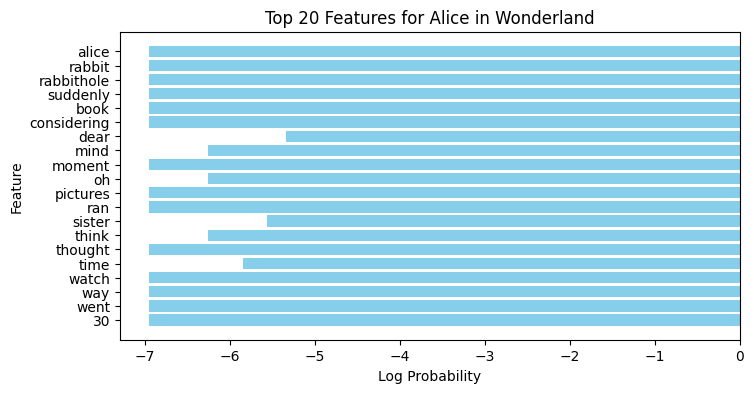

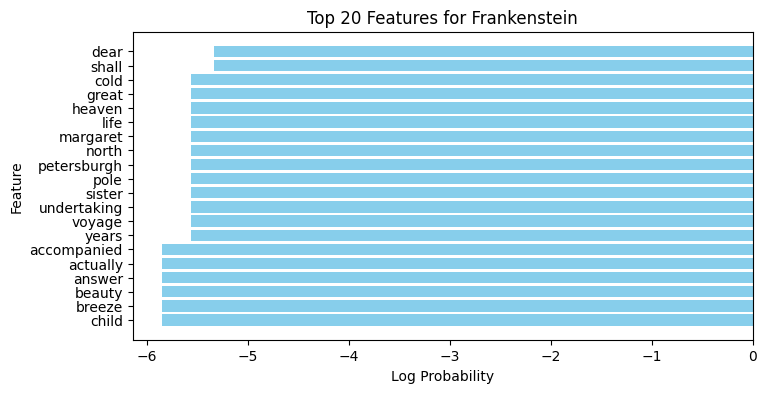

In [28]:
# Get feature names from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the log probabilities of features given the classes
log_probabilities = classifier.feature_log_prob_

# Zip feature names with their corresponding log probabilities
feature_probabilities = list(zip(feature_names, log_probabilities[0], log_probabilities[1]))

# Sort the features based on their log probabilities for each class
sorted_features_alice = sorted(feature_probabilities, key=lambda x: x[1], reverse=True)
sorted_features_frankenstein = sorted(feature_probabilities, key=lambda x: x[2], reverse=True)

# Function to plot feature importance
def plot_feature_importance(sorted_features, class_name):
    top_N = 20
    features = [feature for feature, _, _ in sorted_features[:top_N]]
    probabilities = [prob for _, _, prob in sorted_features[:top_N]]

    plt.figure(figsize=(8, 4))
    plt.barh(features, probabilities, color='skyblue')
    plt.xlabel('Log Probability')
    plt.ylabel('Feature')
    plt.title(f'Top {top_N} Features for {class_name}')
    plt.gca().invert_yaxis()  # Invert y-axis to have highest probabilities at the top
    plt.show()

# Plot feature importance for 'Alice in Wonderland'
plot_feature_importance(sorted_features_alice, 'Alice in Wonderland')

# Plot feature importance for 'Frankenstein'
plot_feature_importance(sorted_features_frankenstein, 'Frankenstein')

Higher log probabilities (closer to 0) indicate higher original probabilities. <br>
In a Naive Bayes classifier, features with higher log probabilities are more important for a given class.

# 2. [Support Vector Machine](#svm)
Named Entity Recognition (NER): Train a Support Vector Machine model to perform NER on the text data, identifying and classifying entities such as names of characters, locations, and organizations in both books. Evaluate the performance of the SVM on correctly identifying named entities.

In [7]:
# python -m spacy download en_core_web_sm

In [30]:
import spacy
import numpy as np
import random
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Load spacy model for initial NER annotations
nlp = spacy.load("en_core_web_sm")

# Load text data
def load_text(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        return file.read()

alice_text = load_text("alice.txt")
frankenstein_text = load_text("frankenstein.txt")

# Combine the texts
combined_text = alice_text + "\n\n" + frankenstein_text

In [31]:
# Annotate text with spacy NER
doc = nlp(combined_text)

# Extract features for each token
def extract_features(token, window=2):
    features = {
        'text': token.text,
        'lemma': token.lemma_,
        'pos': token.pos_,
        'tag': token.tag_,
        'dep': token.dep_,
        'shape': token.shape_,
        'is_alpha': token.is_alpha,
        'is_stop': token.is_stop,
    }
    # Add context features
    for i in range(1, window+1):
        if token.i - i >= 0:
            prev_token = token.doc[token.i - i]
            features.update({
                f'-{i}:text': prev_token.text,
                f'-{i}:lemma': prev_token.lemma_,
                f'-{i}:pos': prev_token.pos_,
                f'-{i}:tag': prev_token.tag_,
            })
        else:
            features.update({f'-{i}:text': '', f'-{i}:lemma': '', f'-{i}:pos': '', f'-{i}:tag': ''})
        if token.i + i < len(token.doc):
            next_token = token.doc[token.i + i]
            features.update({
                f'+{i}:text': next_token.text,
                f'+{i}:lemma': next_token.lemma_,
                f'+{i}:pos': next_token.pos_,
                f'+{i}:tag': next_token.tag_,
            })
        else:
            features.update({f'+{i}:text': '', f'+{i}:lemma': '', f'+{i}:pos': '', f'+{i}:tag': ''})
    return features

In [32]:
# Prepare data for training
X = []
y = []
for token in doc:
    if token.ent_type_:
        label = token.ent_type_
    else:
        label = 'O'  # 'O' for non-entity
    X.append(extract_features(token))
    y.append(label)

# Convert feature dicts to feature vectors
vec = DictVectorizer(sparse=True)
X = vec.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
# Evaluate the model
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Display top 5 most important features (based on weights for linear SVM)
feature_names = vec.get_feature_names_out()
coefficients = svm.coef_.toarray()
top_features = np.argsort(coefficients[0])[-5:]
for feature in top_features:
    print("Feature:", feature_names[feature], "Weight:", coefficients[0][feature])

Accuracy: 0.9872430631790136


C:\ProgramData\Anaconda3\envs\text_workshop\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\Anaconda3\envs\text_workshop\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    CARDINAL       0.77      0.82      0.80        78
        DATE       0.82      0.72      0.76       142
       EVENT       0.00      0.00      0.00         1
         FAC       0.73      0.53      0.62        15
         GPE       0.71      0.79      0.75        58
    LANGUAGE       1.00      0.60      0.75         5
         LAW       1.00      0.60      0.75        25
         LOC       0.47      0.53      0.50        15
        NORP       0.75      0.75      0.75        12
           O       0.99      1.00      0.99     25584
     ORDINAL       0.79      0.92      0.85        24
         ORG       0.67      0.49      0.56        94
      PERSON       0.85      0.90      0.87       229
     PRODUCT       1.00      0.12      0.22         8
    QUANTITY       1.00      0.59      0.74        17
        TIME       0.78      0.73      0.76        74
 WORK_OF_ART       0.26      0.17      0.20        36

    accuracy              

C:\ProgramData\Anaconda3\envs\text_workshop\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 3. [KNN](#knn)
Text Clustering: Use KNN to cluster similar paragraphs from both books together based on their textual features. Experiment with different distance metrics and values of k to see how they affect the clustering results.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Split the text into paragraphs for Alice in Wonderland
alice_paragraphs = [paragraph.strip() for paragraph in alice_text.split("\n\n") if paragraph.strip()]

# Split the text into paragraphs for Frankenstein
frankenstein_paragraphs = [paragraph.strip() for paragraph in frankenstein_text.split("\n\n") if paragraph.strip()]

# Combine the paragraphs and create labels
all_paragraphs = alice_paragraphs + frankenstein_paragraphs
labels = [0] * len(alice_paragraphs) + [1] * len(frankenstein_paragraphs)

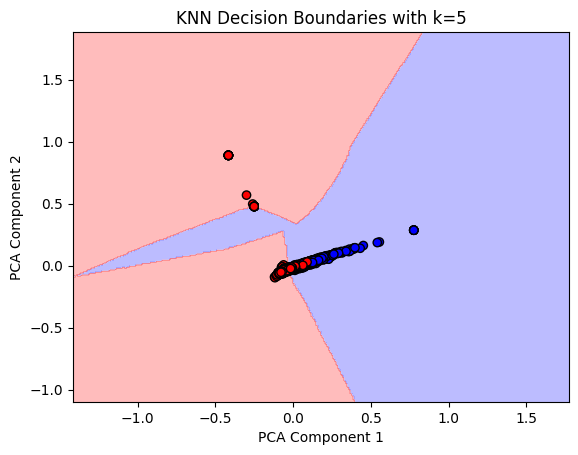

In [35]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(all_paragraphs)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Train KNN model
k = 5  # You can adjust k as needed
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_pca, labels)

# Plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Plot decision boundaries
plot_decision_boundaries(X_pca, labels, knn, title='KNN Decision Boundaries with k=5')

# 4. [Decision treees](#dt)
Feature Importance Analysis: Train a decision tree classifier to distinguish between "Alice in Wonderland" and "Frankenstein" chapters. After training, analyze the most important features (e.g., words or word combinations) used by the decision tree to make classification decisions.



In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Extract the first chapter from "Alice in Wonderland"
alice_first_chapter = alice_text.split("CHAPTER")[1]

# Extract the first chapter from "Frankenstein"
# Search for the beginning of the first chapter based on known patterns
frankenstein_first_chapter_match = re.search(r'(?:\bLETTER\b|\bChapter\b)', frankenstein_text, re.IGNORECASE)
frankenstein_first_chapter_start = frankenstein_first_chapter_match.start()
frankenstein_first_chapter = frankenstein_text[frankenstein_first_chapter_start:]

# Preprocess text data
alice_first_chapter = preprocess_text(alice_first_chapter)
frankenstein_first_chapter = preprocess_text(frankenstein_first_chapter)

# Tokenize sentences    
alice_sentences = tokenize_sentences(alice_text)
frankenstein_sentences = tokenize_sentences(frankenstein_text)

texts= alice_sentences + frankenstein_sentences

labels = ['Alice'] * len(alice_sentences) + ['Frankenstein'] * len(frankenstein_sentences)

# Combine texts and labels
combined = list(zip(texts, labels))

# Shuffle data
random.shuffle(combined)
texts, labels = zip(*combined)

# Convert labels to binary format
label_dict = {'Alice': 0, 'Frankenstein': 1}
y = np.array([label_dict[label] for label in labels])

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, random_state=42)

In [11]:
# Step 1: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=None, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)

# Step 2: Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=32, max_depth=5, min_samples_split=10)
dt_classifier.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=32)

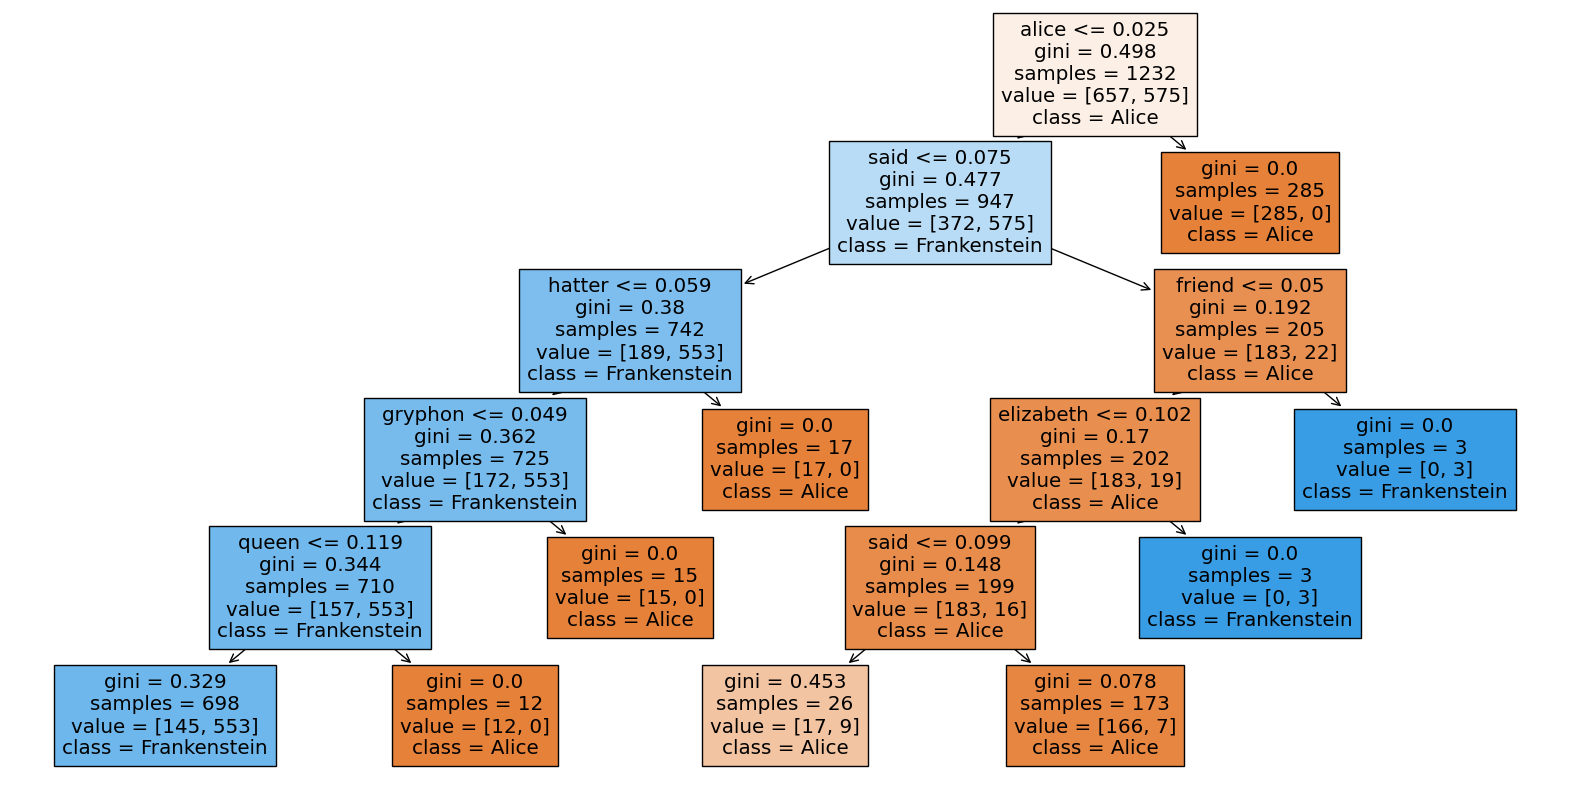

Accuracy: 0.86084142394822
Top 5 most important features:
Feature: alice Importance: 0.45080489817742936
Feature: said Importance: 0.37668772146095797
Feature: hatter Importance: 0.053941874685574924
Feature: gryphon Importance: 0.04974093332646638
Feature: queen Importance: 0.041332007635172426


In [12]:
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=vectorizer.get_feature_names_out(), class_names=["Alice", "Frankenstein"], filled=True)
# plt.savefig('./dt.png', bbox_inches='tight', dpi=1000)
plt.show()

# Step 7: Evaluate the decision tree classifier
X_test_tfidf = vectorizer.transform(X_test)
accuracy = dt_classifier.score(X_test_tfidf, y_test)
print("Accuracy:", accuracy)

# Step 8: Extract feature importance
feature_names = vectorizer.get_feature_names_out()
feature_importance = dt_classifier.feature_importances_

# # Step 9: Display feature importance
# for i, feature in enumerate(feature_names):
#     print("Feature:", feature, "Importance:", feature_importance[i])

# Step 9: Display feature importance
sorted_indices = np.argsort(feature_importance)[::-1]  # Sort indices in descending order of importance

print("Top 5 most important features:")
for i in sorted_indices[:5]:
    print("Feature:", feature_names[i], "Importance:", feature_importance[i])

# 5. [Random Forest](#rf)
Authorship Attribution: Instead of classifying by book, train a random forest classifier to predict the authorship of individual chapters or chunks of text. Use additional texts by the same authors or other similar authors to train the model, and then test it on "Alice in Wonderland" and "Frankenstein" chapters.


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Load the text data
alice_text = load_text("alice.txt")
frankenstein_text = load_text("frankenstein.txt")

# Split the text into paragraphs for Alice in Wonderland
alice_paragraphs = [paragraph.strip() for paragraph in alice_text.split("\n\n") if paragraph.strip()]

# Split the text into paragraphs for Frankenstein
frankenstein_paragraphs = [paragraph.strip() for paragraph in frankenstein_text.split("\n\n") if paragraph.strip()]

# Create labels for the paragraphs
alice_labels = np.zeros(len(alice_paragraphs))  # Label 0 for Alice
frankenstein_labels = np.ones(len(frankenstein_paragraphs))  # Label 1 for Frankenstein

# Combine the paragraphs and labels
all_paragraphs = alice_paragraphs + frankenstein_paragraphs
all_labels = np.concatenate([alice_labels, frankenstein_labels])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_paragraphs, all_labels, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Random Forest model on original data with limited depth
max_depth = 5  # Set the maximum depth of the decision tree
rf_classifier = RandomForestClassifier(max_depth=max_depth, random_state=42).fit(X_train_tfidf, y_train)

# Train the Random Forest classifier
# rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predict authorship on test data
y_pred = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8058252427184466



Top 5 Most Important Features:
Feature: said, Importance: 0.07160689193024906
Feature: man, Importance: 0.0482875208785049
Feature: alice, Importance: 0.03605544335800449
Feature: father, Importance: 0.022195739753183258
Feature: clerval, Importance: 0.02121717414243522


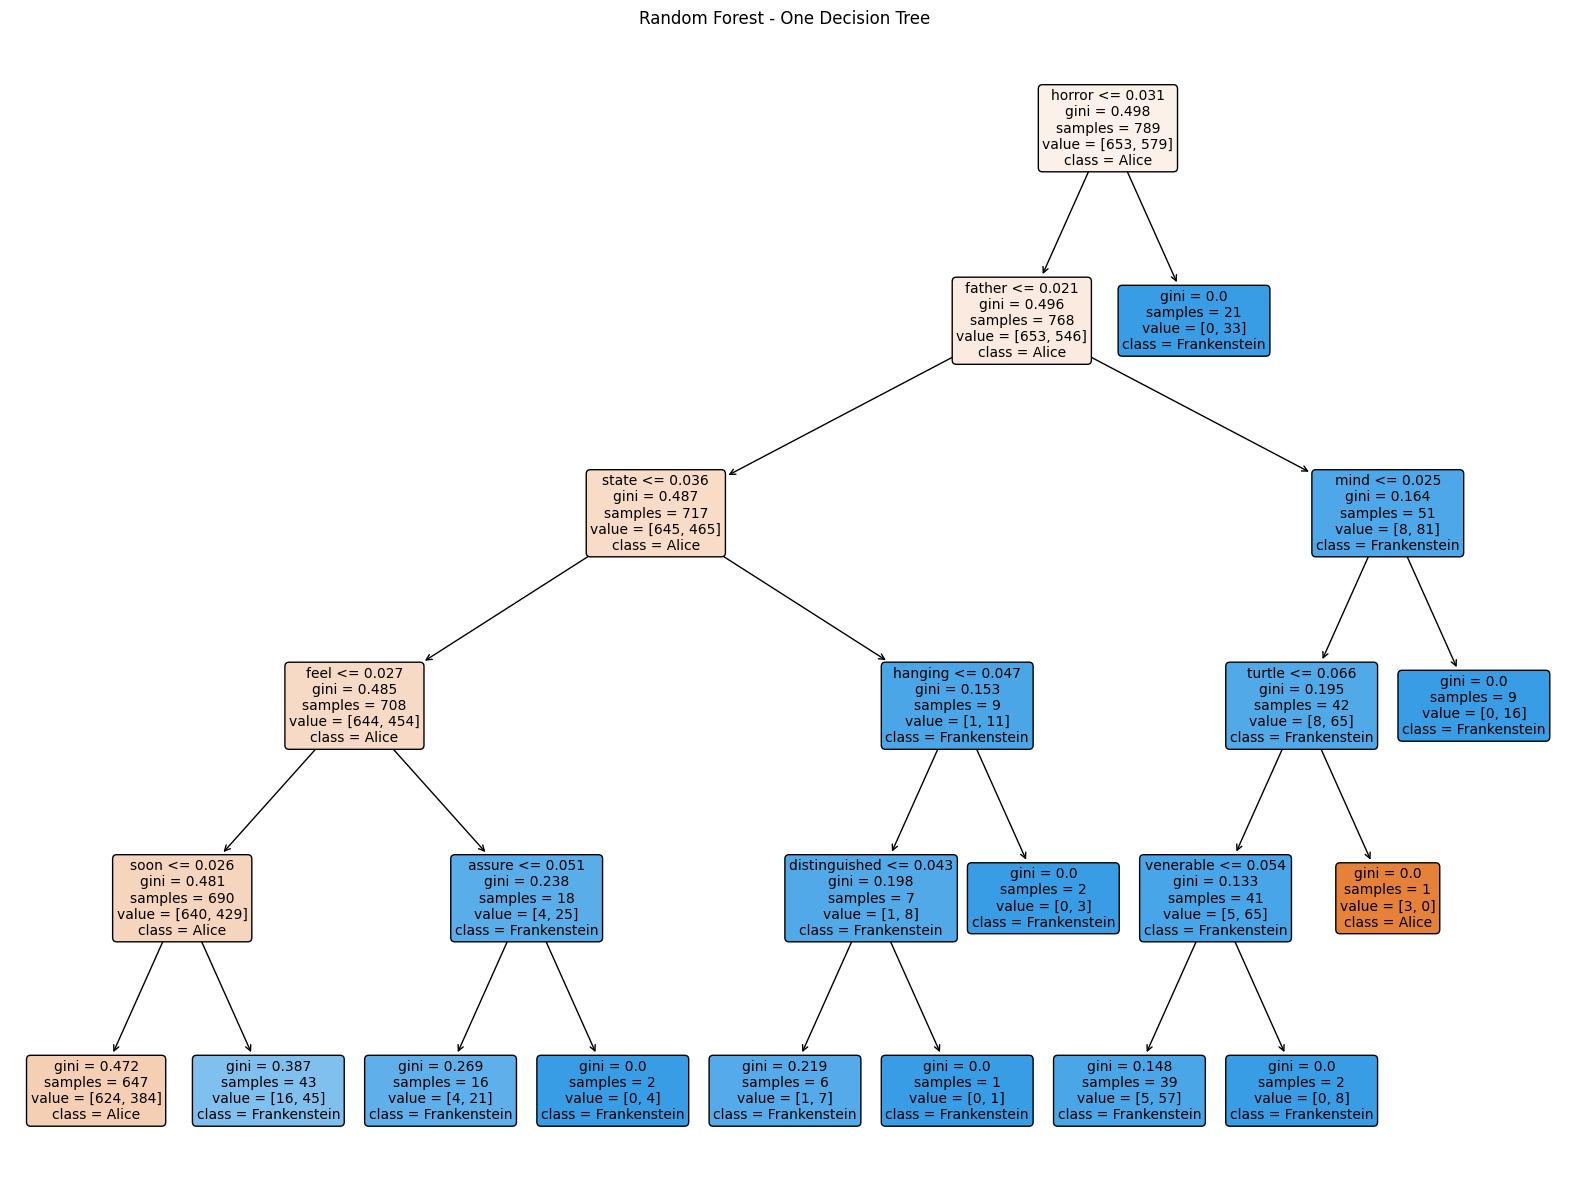

In [14]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Get the indices of the top 5 most important features
top_indices = np.argsort(feature_importances)[-5:][::-1]

# Print the top 5 most important features
print("\nTop 5 Most Important Features:")
for idx in top_indices:
    print(f"Feature: {feature_names[idx]}, Importance: {feature_importances[idx]}")
    
# Plot one of the trees from the Random Forest
plt.figure(figsize=(20,15))
plot_tree(rf_classifier.estimators_[0], filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=['Alice', 'Frankenstein'], rounded=True)
plt.title("Random Forest - One Decision Tree")
plt.show()